In [1]:
!pip install pyforest
!pip install -U spacy
!python -m spacy download en_core_web_trf
!pip install tweet-preprocessor

  Created wheel for pyforest: filename=pyforest-1.1.0-py2.py3-none-any.whl size=14606 sha256=ef97ea06ceaedff9ea87f571bd7d8e7e0ad1171fa90628505f82af3f1abbaf88
  Stored in directory: /root/.cache/pip/wheels/61/1c/da/48e6c884142d485475d852d69d20a096aba5beceb338822893
Successfully built pyforest
     |████████████████████████████████| 6.4 MB 14.3 MB/s 
     |████████████████████████████████| 621 kB 18.9 MB/s 
     |████████████████████████████████| 42 kB 967 kB/s 
     |████████████████████████████████| 456 kB 18.8 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.5
    Uninstalling thinc-7.4.5:
      Successfully uninstalled thinc-7.4.5
  Attempting unin

In [2]:
import pyforest
import spacy
import en_core_web_trf
sp = spacy.load('en_core_web_trf')
from matplotlib import pyplot
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from nltk.corpus import stopwords
stop = stopwords.words('english')
import preprocessor as p
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
df = pd.read_csv('../input/fake-and-true-tweets/fake_true_tweets.txt', delimiter = '\t', usecols = ['post_text', 'label'])

<IPython.core.display.Javascript object>

In [4]:
df.sample(10)

,post_text,label
2192,New York visitada por el huracán #sandy 2012 h...,fake
12594,15 Irish people are officially missing after #...,fake
12077,Partial Solar Eclipse and transit of ISS taken...,real
9103,RT @YourAnonNews: Spare a thought for #Jamaica...,real
4512,Terrible catástrofe del huracán Sandy de su pa...,fake
2058,DAMN NATURE!!!! #sandy #bigtroubleinthebronx h...,fake
5778,Shark swimming in front yard. #NBD #insta #hur...,fake
8586,#sandy no light. Ma fav city look stony.. http...,real
8736,Damn #sandy http://t.co/A248WHwR,real
4078,"Huracan Sandy, y asi es como empezo el fin del...",fake


In [5]:
# Set those options which we want to remove from tweets
p.set_options(p.OPT.URL, p.OPT.EMOJI, p.OPT.SMILEY, p.OPT.NUMBER)

In [6]:
# then apply clean function to remove above defined options
def api_clean(x):
    return p.clean(x)

df['clean_text_api'] = df['post_text'].apply(api_clean)

In [7]:
# remove hashtags sign and lowercase the words
def cleaner(tweet):
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    return tweet.lower()

In [8]:
# remove the characters other than letters
df['clean_text_api'] = df['clean_text_api'].str.replace("[^a-zA-Z]", " ")

/opt/conda/lib/python3.7/site-packages/pyforest/__init__.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  from ._imports import *


In [9]:
df['clean_text_remove_hashtags'] = df['clean_text_api'].apply(cleaner)

In [10]:
df.sample(10)

,post_text,label,clean_text_api,clean_text_remove_hashtags
3005,خطية جايين يسووگون للعيد من المول !! #Sandy ht...,fake,Sandy,sandy
15097,SYRIA! SYRIAN HERO BOY rescue girl in shootout...,fake,SYRIA SYRIAN HERO BOY rescue girl in shootout...,syria syrian hero boy rescue girl in shootout...
10779,#Leadership RT @AlexYudelson: Remember Preside...,real,Leadership RT AlexYudelson Remember Preside...,leadership rt alexyudelson remember preside...
6879,Boston Marathon suspect #2 with white hat (far...,real,Boston Marathon suspect with white hat far...,boston marathon suspect with white hat far...
4181,my dad just sent me this to be ironic. My mom'...,fake,my dad just sent me this to be ironic My mom ...,my dad just sent me this to be ironic my mom ...
8580,Taxi Cabs under water - #sandy aj_magnberg's p...,real,Taxi Cabs under water sandy aj magnberg s p...,taxi cabs under water sandy aj magnberg s p...
124,Wow... the missing kid Sunil Tripathi sure doe...,fake,Wow the missing kid Sunil Tripathi sure doe...,wow the missing kid sunil tripathi sure doe...
1513,الله يكفينا من الشر 😱 #statueofliberty #ny #hu...,fake,statueofliberty ny hurticane sandy,statueofliberty ny hurticane sandy
3810,"\""@Daweeq: HURRICANE #SANDY IS GETTING REAL ht...",fake,Daweeq HURRICANE SANDY IS GETTING REAL,daweeq hurricane sandy is getting real
114,FBI missing person / Bombing suspect = Same pe...,fake,FBI missing person Bombing suspect Same pe...,fbi missing person bombing suspect same pe...


In [11]:
# lemmatization of the words
tokenized_tweet_text = df.clean_text_remove_hashtags.apply(lambda sentence: [ word.lemma_ for word in sp(sentence)]) # lemmatize
for i in range(len(tokenized_tweet_text)):
    tokenized_tweet_text[i] = ' '.join(tokenized_tweet_text[i])
df['clean_text_remove_hashtags_lemma'] = tokenized_tweet_text

In [12]:
# remove words that contains two or less than two characters
df['clean_text_remove_hashtags_lemma'] = df.clean_text_remove_hashtags_lemma.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 2]))

In [13]:
# Stemming (either lemmatization or stemming can be used)
df.temp = df.clean_text_remove_hashtags.apply(lambda x: x.split())
from nltk.stem.porter import * 
stemmer = PorterStemmer() 
tokenized_tweet_text = df.temp.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
for i in range(len(tokenized_tweet_text)):
    tokenized_tweet_text[i] = ' '.join(tokenized_tweet_text[i])    
df['clean_text_remove_hashtags_stem'] = tokenized_tweet_text

/opt/conda/lib/python3.7/site-packages/pyforest/__init__.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  from ._imports import *


In [14]:
# remove words with more than two repetition of same character
df.temp = df['clean_text_remove_hashtags_lemma'].apply(lambda x: x.split())
tokenized_tweet_text = df.temp.apply(lambda x: [re.sub(r'((\w)\2{2,})', '', i) for i in x])
for i in range(len(tokenized_tweet_text)):
    tokenized_tweet_text[i] = ' '.join(tokenized_tweet_text[i])    
df['clean_text_remove_hashtags_lemma_rep'] = tokenized_tweet_text

In [15]:
# remove stopwords
df.temp = df['clean_text_remove_hashtags_lemma_rep'].apply(lambda x: x.split())
tokenized_tweet_text = df.temp.apply(lambda x: [item for item in x if item not in stop])
for i in range(len(tokenized_tweet_text)):
    tokenized_tweet_text[i] = ' '.join(tokenized_tweet_text[i])
df['clean_text_remove_hashtags_lemma_rep_stop'] = tokenized_tweet_text

In [16]:
df.sample(10)

,post_text,label,clean_text_api,clean_text_remove_hashtags,clean_text_remove_hashtags_lemma,clean_text_remove_hashtags_stem,clean_text_remove_hashtags_lemma_rep,clean_text_remove_hashtags_lemma_rep_stop
3697,NewYork Hurricane Sandy http://t.co/pfOLrLbo,fake,NewYork Hurricane Sandy,newyork hurricane sandy,newyork hurricane sandy,newyork hurrican sandi,newyork hurricane sandy,newyork hurricane sandy
9011,Reminds me of I Am Legend or The Last of Us :0...,real,Reminds me of I Am Legend or The Last of Us ...,reminds me of i am legend or the last of us ...,remind legend the last photograph photography ...,remind me of i am legend or the last of us me ...,remind legend the last photograph photography ...,remind legend last photograph photography nyc ...
3080,wasn't this faked? “@MindBlowing: A shark was ...,fake,wasn t this faked MindBlowing A shark was p...,wasn t this faked mindblowing a shark was p...,wasn this fake mindblowing shark photograph sw...,wasn t thi fake mindblow a shark wa photograph...,wasn this fake mindblowing shark photograph sw...,fake mindblowing shark photograph swim road ne...
10058,RT @MarkBorkowski: Love this. The milk of huma...,real,RT MarkBorkowski Love this The milk of huma...,rt markborkowski love this the milk of huma...,markborkowski love this the milk human kindnes...,rt markborkowski love thi the milk of human ki...,markborkowski love this the milk human kindnes...,markborkowski love milk human kindness sandy
11351,just so you know… #sandy http://t.co/6IsaRIZT,real,just so you know sandy,just so you know sandy,just you know sandy,just so you know sandi,just you know sandy,know sandy
5793,"Omg RT @lamiyaahh Damn RT @ChrisHarris34: \""@D...",fake,Omg RT lamiyaahh Damn RT ChrisHarris D...,omg rt lamiyaahh damn rt chrisharris d...,omg lamiyaahh damn chrisharris darealniecey hu...,omg rt lamiyaahh damn rt chrisharri darealniec...,omg lamiyaahh damn chrisharris darealniecey hu...,omg lamiyaahh damn chrisharris darealniecey hu...
3851,Ужас.\n#Sandy http://t.co/voPhJqbH,fake,n Sandy,n sandy,sandy,n sandi,sandy,sandy
11073,Ils sont sympa ces new-yorkais (via @ppgarcia7...,real,Ils sont sympa ces new yorkais via ppgarcia ...,ils sont sympa ces new yorkais via ppgarcia ...,ils sont sympa ces new yorkais via ppgarcia sandy,il sont sympa ce new yorkai via ppgarcia sandi,ils sont sympa ces new yorkais via ppgarcia sandy,ils sont sympa ces new yorkais via ppgarcia sandy
7563,Jersey princess hurricane wine dora the explor...,real,Jersey princess hurricane wine dora the explor...,jersey princess hurricane wine dora the explor...,jersey princess hurricane wine dora the explor...,jersey princess hurrican wine dora the explor ...,jersey princess hurricane wine dora the explor...,jersey princess hurricane wine dora explorer r...
2512,RT @DeboConfesarQue: El huracán Sandy llevó un...,fake,RT DeboConfesarQue El huracn Sandy llev un t...,rt deboconfesarque el huracn sandy llev un t...,deboconfesarque huracn sandy llev tiburn hasta...,rt deboconfesarqu el huracn sandi llev un tibu...,deboconfesarque huracn sandy llev tiburn hasta...,deboconfesarque huracn sandy llev tiburn hasta...


# Split the dataset for Classification

In [17]:
X = df['clean_text_remove_hashtags_lemma_rep_stop'] # Try and test different pr-processed column
y = df.label

In [18]:
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle = True, random_state = 123)

In [19]:
vect = CountVectorizer(stop_words='english')
X_train = vect.fit_transform(X_train)

In [20]:
X_train.shape

(11721, 9645)

In [21]:
X_val = vect.transform(X_val)

print(X_train.shape, X_val.shape)

(11721, 9645) (3908, 9645)


# Random Forest Classifier

In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
# get importance
importancee = model.feature_importances_

# Feature Importance

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                 word             importance
1163          bsqueda  9.966561171524954e-07
3667              hey  9.917706019506723e-06
4273            jalan  9.798396084679712e-06
4001  impressionnante  9.739546858940235e-06
3375      goodmorning  9.717397142242449e-06
5458           mmarzo  9.717397142239496e-07
1362               cd  9.673238962231213e-06
9564              ykk  9.623427853584522e-06
1445              chi   9.56614554493153e-06
5910      nohurricane  9.509373167814207e-06


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='importance', ylabel='word'>

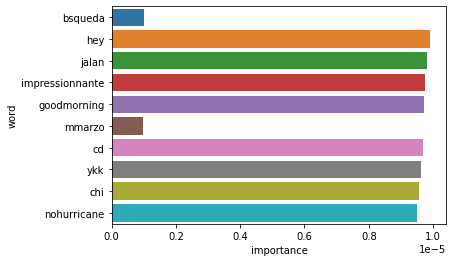

In [23]:
feat_impts = [vect.get_feature_names()]
feat_impts.append(importancee)
df_feats_impts = pd.DataFrame(np.transpose(np.array(feat_impts)), columns = ["word","importance"])
# print top 10 words based on importance values
top = df_feats_impts[["word","importance"]].sort_values(by = "importance", ascending = False).head(10)
print(top)
top['importance'] = pd.to_numeric(top['importance'])
sns.barplot(x = "importance", y = "word", data = top)

In [24]:
# Can see single prediction
X_sample = vect.transform([df.loc[14764]['post_text']])

model.predict(X_sample)

array(['fake'], dtype=object)

# Evaluate Results

In [25]:
y_pred_test = model.predict(X_val)
print(accuracy_score(y_val, y_pred_test))
print(confusion_matrix(y_val, y_pred_test))
print(classification_report(y_val, y_pred_test))

0.8753838280450358
[[2147  186]
 [ 301 1274]]
              precision    recall  f1-score   support

        fake       0.88      0.92      0.90      2333
        real       0.87      0.81      0.84      1575

    accuracy                           0.88      3908
   macro avg       0.87      0.86      0.87      3908
weighted avg       0.88      0.88      0.87      3908



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

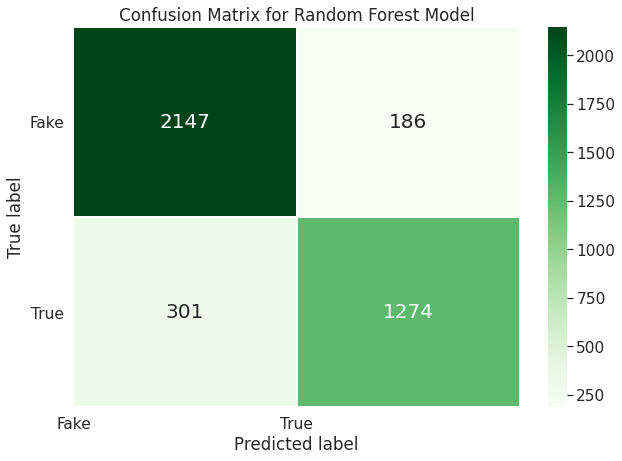

In [26]:
# Plot Confusion Matrix
matrix = confusion_matrix(y_val, y_pred_test)
plt.figure(figsize=(10,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':20},
            cmap=plt.cm.Greens, linewidths=0.2, fmt="d")

# Add labels to the plot
class_names = ['Fake','True']
tick_marks1 = np.arange(len(class_names))
tick_marks2 = tick_marks1 + 0.5
plt.xticks(tick_marks1, class_names, rotation=0)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()